In [1]:
#importing relavent libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Part 1 - understanding and cleaning the data

## Explanation for all columns

**age**  -     The age of the insured client

**sex**   -    The Gender of the insured client

**BMI**   - Body Mass Index ,  is a value derived from the mass (weight) and height of a person. This value influences the                 health of a given person. Generally a good bmi is between 18.5 to 25

**children**        -  Number of children covered by health insurance / Number of dependents.

**smoker**             - Whether the insured customer has smokes or not.

**region**     -   The beneficiary's residential area in the US -  northeast, southeast, southwest and northwest.

**charges**     -  The amount paid periodically to the insurer by the insured client.



#### Lets start examining the data

In [3]:
df.shape
#1338 rows , 7 columns 

(1338, 7)

In [4]:
df.isnull().sum()
#Great! no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3 non numerical values , 2 of them are easy to deal with since they are yes or no values. The region is a bit trickier so to better understand this column we will use the value_counts method. lets see exactly what we are dealing with.

In [6]:
df["region"].value_counts()
#Good! only 4 regions, we will soon change them to numerical values

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [7]:
df.describe()
#Wanting to get an idea of what is a regular price for the health insurence, and other information, df.describe() is very helpful

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Are data is pretty clean , and we now have a good understanding of it. Therefore we can move on to visualizing.

##  Part 2 -  Visualization

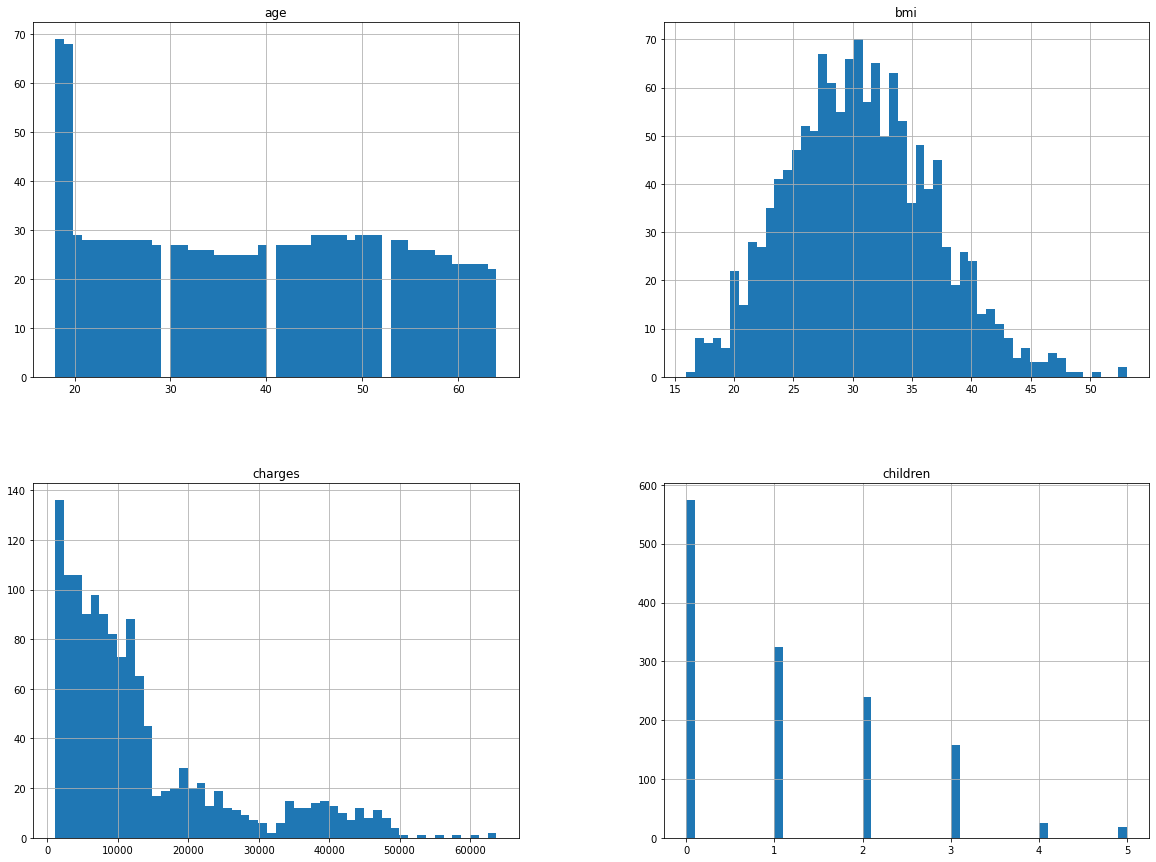

In [8]:
df.hist(bins=50, figsize=(20,15))
pl.show()

* Exculding bmi , are histograms are head heavy , meaning they extend much farther to the left then to the right. In other words in the numerical columns there is more smaller attributes rather then large ones.
* The bmi histiogram is more centerd and balanced , meaning most insured clients's bmi are around 30-35

In order to continue vizualizing all of my data set properly and start finding correlations, i will use the LabelEncoder function to change all my data to numerical. The function will chage smoker and sex to 0 or 1 (female = 0 , male = 1) , and change the regions to 0,1,2,3.

### Turning data to numerical using LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder
labelE = LabelEncoder()
df['sex'] = labelE.fit_transform(df['sex'])
df['smoker'] = labelE.fit_transform(df['smoker'])
df['region'] = labelE.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
#now that my data is all numerical i can run a corelation map to unterstand better which values have strong corelation to charges.
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

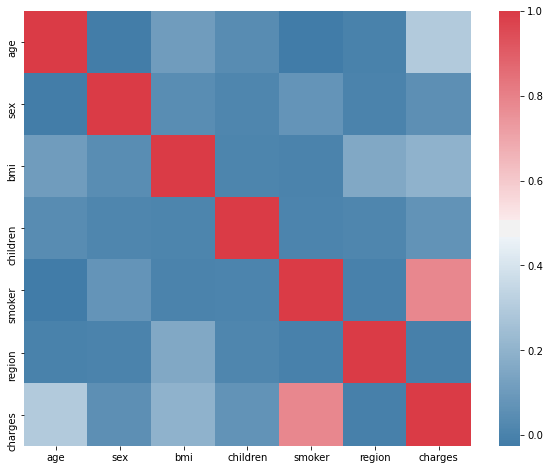

In [11]:
#lets see that in a heat map
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(df.corr() , cmap=sns.diverging_palette(240,10,as_cmap=True) ,ax=ax)

#### Observations


* **1.** A very strong correlation is observed  with wether the patient smokes or not.

* **2.** Observing the  age and bmi factors , we see they do have some correlation with charges but not as strong as i expected.

* **3.** I would like to investigate smoking and bmi in more detail. In order to do that im going to first see the Distribution of charges for smokers/ non smokers. Then do the same for bmi ( obese/ non obese) , and then see those to factors together with charges and fully grasp who pays more for health insurance, obese non smokers or maybe non obese smokers?
 

Ploting the connection between smoking , obesity and charges. As well as the relationship with age 

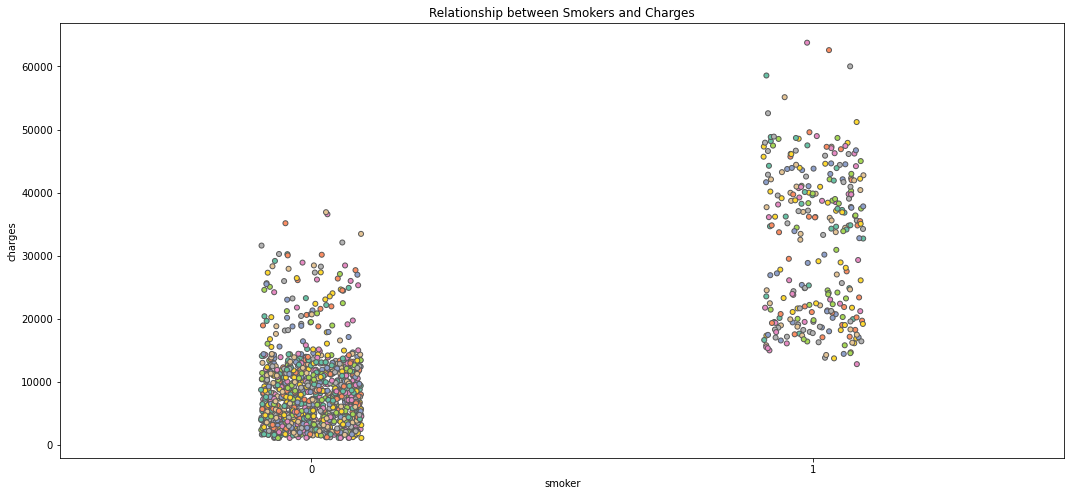

In [12]:
f, ax = pl.subplots(figsize=(18,8))
sns.stripplot(x="smoker", y="charges", hue="bmi", data=df, ax=ax, linewidth=1, palette="Set2")
ax.legend_.remove()
ax.set_title("Relationship between Smokers and Charges")

pl.show()

A quick google search lets me know that bmi obove 30 is obese so lets create plots showing the charges among obese and non obese patients.
https://www.cdc.gov/obesity/adult/defining.html

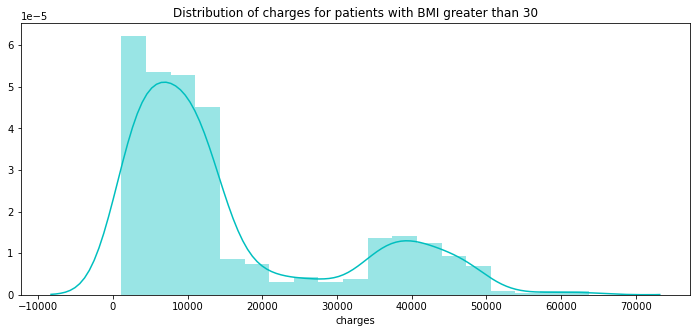

In [13]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'c')

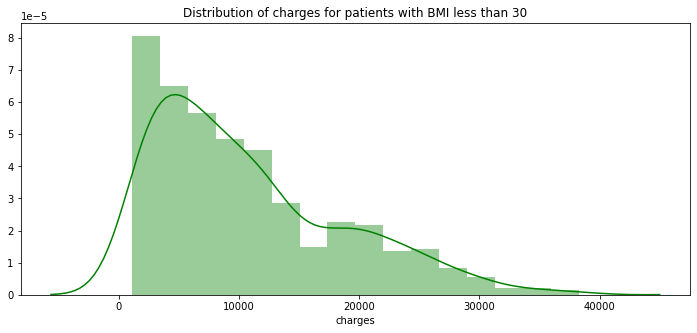

In [14]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'g' )

Just as we suspected and quite trivialy Patients with BMI above 30 spend more on treatment!

now lets show a scatter plot of smoking and obesity together.

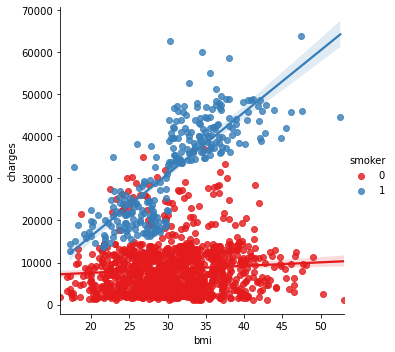

In [15]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set1')

#### Observations
*  We can see that charges are more impacted by smokers rather then obesity, and the linear line goes sky high for clients that smoke and have an high bmi. Insured clients that don't smoke don't pay that much more as the bmi grows.

*  However we do see that there is a large group of obese clients that are paying around 40,000$ on health insurance which is a crazy high price.

*  Previously we also saw correlation between age and charges so let's see one final graph similar to the one we just saw but with age instead of bmi

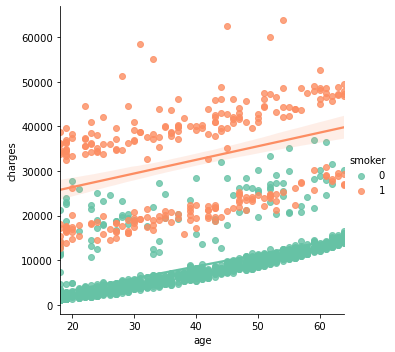

In [16]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set2')

We see a very similiar pattern when it comes to smoking clients. Although not like the bmi graph we see the linear line growing in the same pace between smokers and non smokers as the age progresses. This means that age rather then bmi has  more impact on the charges, even when it comes to smoking/non smoking clients.

## Part 3 -  Machine learning algorithms

 <span style="color:red"> **Step 1** </span> - Spliting the data into train test 
 
<span style="color:red"> **Step 2** </span> - Applying Machine Learning Algorithms(linear regression, decesion tree regressor)

<span style="color:red"> **Step 3** </span> - Evaluting are algorithms and fine tuning them in order to achieve the best results

<span style="color:red"> **Step 4** </span>-  Conclusions

#### Spliting the data into train test 

In [17]:
from sklearn.model_selection import train_test_split 

from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (1070, 6)
 Shape of x_test =  (268, 6)
 Shape of y_train =  (1070,)
 Shape of y_test =  (268,)


In [18]:
from sklearn.dummy import DummyRegressor
dummy_regr_mean = DummyRegressor(strategy="mean")
dummy_regr_mean.fit(x_train, y_train)

print (metrics.mean_squared_error(y_test,dummy_regr_mean.predict(x_test), squared=False))
#getting dummy classifier score to know how well i'm actually scoring on my model

12619.408067596905


So i used a dummy regressor to better understant how well my model will preform. We got an rmse score of 12619

Before applying machine learning algorithms, i want to standarize my data. I will do so by using sklearn's StandardScaler function in order to scale my training set.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

### Applying Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print("linear regression score : " , Lin_reg.score(x_test, y_test))
x_train_pred = Lin_reg.predict(x_train)
x_test_pred = Lin_reg.predict(x_test)
lin_mse = metrics.mean_squared_error(x_train_pred, y_train)
lin_rmse = np.sqrt(lin_mse)
print("linear regression mean squared error : " ,  lin_rmse)
print('R-Squared score: ',Lin_reg.score(x_train, y_train))

linear regression score :  0.7998747145449959
linear regression mean squared error :  6142.440924408569
R-Squared score:  0.7368306228430944


* Not a bad score for lazy implemanation without optimizing are model. I wanted to see the score and rmse and r2 and these will be the main factors for how well my model will be preforming.
* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit
* r2 or R-Squard is the proportion of the variance in the dependent variable that is predictable from the independent variable. to put it simply - It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.
* The higher the r2 the better. The lower the RMSE the better.
* As we saw when analyzing are data the average price for health insurance in our data is 13,700. Therefore a RMSE of 6,142 is not great.

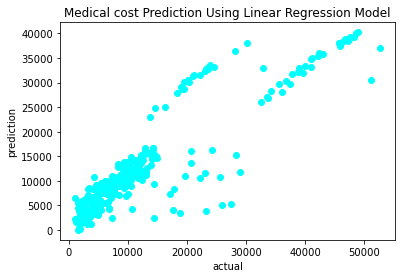

In [21]:
y_pred = Lin_reg.predict(x_test)
pl.scatter(y_test,y_pred, color='cyan')
pl.xlabel("actual")
pl.ylabel("prediction")
pl.title("Medical cost Prediction Using Linear Regression Model")
pl.show()

We do see alot of dots around the linear line however we also see alot of outliers , making are model not so accurate as we would like it to be.

In [22]:
y_pred = Lin_reg.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
Difference = pd.DataFrame(np.array(abs(y_test-y_pred)), columns=["Difference"])
pd.concat([y_test_df , y_pred_df,Difference ] , axis=1)

,Real Values,Predicted Values,Difference
0,9724.53000,11017.230479,1292.700479
1,8547.69130,9787.530168,1239.838868
2,45702.02235,37994.782118,7707.240232
3,12950.07120,16122.778407,3172.707207
4,9644.25250,6930.759230,2713.493270
...,...,...,...
263,15019.76005,14699.098767,320.661283
264,6664.68595,8210.854549,1546.168599
265,20709.02034,16019.284542,4689.735798
266,40932.42950,33104.944084,7827.485416


### Applying Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)
y_pred = dt_reg.predict(x_test)
print("Tree regressor score : " , dt_reg.score(x_test, y_test))
print("Tree regressor mean squared error :" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared score: ',dt_reg.score(x_train, y_train))

Tree regressor score :  0.6317477484221719
Tree regressor mean squared error : 7655.061522849945
R-Squared score:  0.9982963931606104


* A better R-square score but a worse overall score and RMSE.
* I will try to improve my model by grid searching the optimum criterions to use in my tree regressor model.

### Fine tuning decesion tree using GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
max_depth_range = list(range(1, 50))
param_grid = dict(max_depth=max_depth_range,criterion= ['mse', 'mae','friedman_mse'])
grid = GridSearchCV(dt_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)
print(-grid.best_score_)
print(grid.best_params_)

23614785.63591634
{'criterion': 'mse', 'max_depth': 4}


In [25]:
#best criterion is mse and max depth is 4 , lets implement this and see wether we get a better score
dt_reg = DecisionTreeRegressor(random_state=0,criterion='mse',max_depth=4)
dt_reg.fit(x_train, y_train)
y_pred = dt_reg.predict(x_test)
print("Tree regressor score : " , dt_reg.score(x_test, y_test))
print("Tree regressor mean squared error :" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared score: ',dt_reg.score(x_train, y_train))

Tree regressor score :  0.8808763283811872
Tree regressor mean squared error : 4353.865567099532
R-Squared score:  0.8580774806287019


Wow! much better scores all around! 

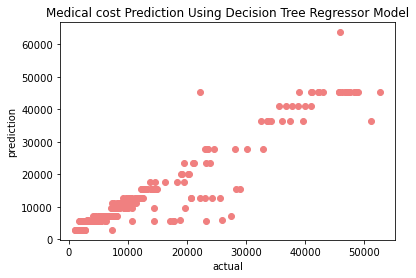

In [26]:
pl.scatter(y_test,y_pred, color='lightcoral')
pl.xlabel("actual")
pl.ylabel("prediction")
pl.title("Medical cost Prediction Using Decision Tree Regressor Model")
pl.show()

In [27]:
y_pred = dt_reg.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
Difference = pd.DataFrame(np.array(abs(y_test-y_pred)), columns=["Difference"])
pd.concat([y_test_df , y_pred_df,Difference ] , axis=1)

,Real Values,Predicted Values,Difference
0,9724.53000,12786.943263,3062.413263
1,8547.69130,9697.498393,1149.807093
2,45702.02235,45262.558108,439.464242
3,12950.07120,15331.941956,2381.870756
4,9644.25250,11192.930411,1548.677911
...,...,...,...
263,15019.76005,15331.941956,312.181906
264,6664.68595,7136.320986,471.635036
265,20709.02034,12786.943263,7922.077077
266,40932.42950,40980.461248,48.031748


After fine tuning the decision tree reggressor we achieved better results then the linear reggressor. Lets use cross validation to truelly determine which model preforms better.

### Evaluating my models better using Cross Validation

#### Cross Validation for Linear Regression

In [28]:
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(Lin_reg, x_train, y_train, cv=10 , scoring='neg_root_mean_squared_error')
print(clf_score)
-clf_score.mean()

[-6125.6414336  -6024.61540022 -4636.70121355 -6649.89200476
 -6180.20336774 -5622.47188008 -6765.47188711 -5553.41077123
 -6968.55355155 -6960.3316571 ]


6148.729316694704

In [29]:
clf_score = cross_val_score(Lin_reg, x_train, y_train, cv=10 , scoring='r2')
print(clf_score)
clf_score.mean()

[0.77477408 0.754611   0.77713091 0.66759839 0.64716899 0.79337381
 0.69000351 0.78518926 0.65187165 0.73573043]


0.7277452033802448

#### Cross Validation for Decision Tree Regressor

In [30]:
clf_score = cross_val_score(dt_reg, x_train, y_train, cv=10 , scoring='neg_root_mean_squared_error')
print(clf_score)
-clf_score.mean()

[-4616.9022386  -4468.07619975 -3555.49223777 -5338.05096297
 -4867.29252001 -4752.27680641 -4956.15395674 -4279.38783408
 -5719.63776047 -5645.04227682]


4819.8312793612695

In [31]:
clf_score = cross_val_score(dt_reg, x_train, y_train, cv=10 , scoring='r2')
print(clf_score)
clf_score.mean()

[0.87205698 0.8650299  0.86895179 0.78580991 0.78115526 0.85238373
 0.83363952 0.87244435 0.76547391 0.82617122]


0.8323116579315879

### CONCLUSION
* In order to evaluate the best model for regression we prefered to use RMSE and r2 score rather than accuracy.
* We noticed what columns in our data have the most and least weight on the prediction and worked accordingly. I tried to drop the gender and regions columns in order to achieve better scores but it didn't work , therefore I didn't add it to the final notebook.
* **Decision Tree Regressor gives the best RMSE and r2 scores.  As well as the best cross validation r2, RMSE mean score, so it is the best model.** 
* Fitting the data properly optimizes the models score (Using the standard scaler)
* Working properly in step 2 (vizualization) helped us estimate properly which columns are most importent for training the models. 
**E.G** even before training and testing the model we knew smoking clients pay alot more health insurance then non smoking clients.